# CrowdTruth for Multiple Choice Tasks: Person Type Extraction in Video

In this tutorial, we will apply CrowdTruth metrics to a **multiple choice** crowdsourcing task for **Person Type Extraction** from **video fragments**. The workers were asked to watch a video of about 3-5 seconds and then pick from a multiple choice list which are the types of person that appear in the video fragment. The task was executed on [FigureEight](https://www.figure-eight.com/). For more crowdsourcing annotation task examples, click [here](https://raw.githubusercontent.com/CrowdTruth-core/tutorial/getting_started.md).

To replicate this experiment, the code used to design and implement this crowdsourcing annotation template is available here: [template](https://raw.githubusercontent.com/CrowdTruth/CrowdTruth-core/master/tutorial/templates/People-Video-Multiple-Choice/template.html), [css](https://raw.githubusercontent.com/CrowdTruth/CrowdTruth-core/master/tutorial/templates/People-Video-Multiple-Choice/template.css), [javascript](https://raw.githubusercontent.com/CrowdTruth/CrowdTruth-core/master/tutorial/templates/People-Video-Multiple-Choice/template.js). 

This is a screenshot of the task as it appeared to workers:

![Task Template](img/person-video-multiple-choice.png)

A sample dataset for this task is available in [this file](https://raw.githubusercontent.com/CrowdTruth/CrowdTruth-core/master/tutorial/data/person-video-multiple-choice.csv), containing raw output from the crowd on FigureEight. Download the file and place it in a folder named `data` that has the same root as this notebook. Now you can check your data:

In [1]:
import pandas as pd

test_data = pd.read_csv("data/person-video-multiple-choice.csv")
test_data.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,...,description,descriptiontags,hiddeninput_gold,imagelocation,imagetags,keyframeid_gold,selected_answer_gold,subtitles,subtitletags,videolocation
0,1856509899,8/20/2018 18:40:05,3990340198,8/20/2018 18:39:51,False,clixsense,1.0,40712302,GBR,J8,...,NaN,NaN,NaN,https://joran.org/ct/entity.admin.unit.2649/85...,industry__c0_###_grinder__c1_###_production__c...,NaN,NaN,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...
1,1856509899,8/20/2018 19:07:38,3990381441,8/20/2018 19:07:29,False,clixsense,1.0,40925305,CAN,QC,...,NaN,NaN,NaN,https://joran.org/ct/entity.admin.unit.2649/85...,industry__c0_###_grinder__c1_###_production__c...,NaN,NaN,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...
2,1856509899,8/20/2018 19:19:02,3990407780,8/20/2018 19:18:52,False,imerit_india,1.0,44399792,USA,LA,...,NaN,NaN,NaN,https://joran.org/ct/entity.admin.unit.2649/85...,industry__c0_###_grinder__c1_###_production__c...,NaN,NaN,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...
3,1856509899,8/20/2018 19:20:32,3990410322,8/20/2018 19:20:14,False,elite,1.0,44185847,USA,FL,...,NaN,NaN,NaN,https://joran.org/ct/entity.admin.unit.2649/85...,industry__c0_###_grinder__c1_###_production__c...,NaN,NaN,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...
4,1856509899,8/20/2018 19:27:03,3990420566,8/20/2018 19:26:19,False,imerit_india,1.0,42395899,USA,LA,...,NaN,NaN,NaN,https://joran.org/ct/entity.admin.unit.2649/85...,industry__c0_###_grinder__c1_###_production__c...,NaN,NaN,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [2]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Person Type/Role Annotation in Video task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`annotation_separator`:** string that separates between the crowd annotations in `outputColumns`
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of relations
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [3]:
class TestConfig(DefaultConfig):
    inputColumns = ["videolocation", "subtitles", "imagetags", "subtitletags"]
    outputColumns = ["selected_answer"]
    
    # processing of a closed task
    open_ended_task = False
    annotation_vector = ["archeologist", "architect", "artist", "astronaut", "athlete", "businessperson","celebrity", 
                         "chef", "criminal", "engineer", "farmer", "fictionalcharacter", "journalist", "judge", 
                         "lawyer", "militaryperson", "model", "monarch", "philosopher", "politician", "presenter", 
                         "producer", "psychologist", "scientist", "sportsmanager", "writer", "none", "other"]
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
            # remove square brackets from annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('[',''))
            judgments[col] = judgments[col].apply(lambda x: str(x).replace(']',''))
            # remove the quotes around the annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('"',''))
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [4]:
data, config = crowdtruth.load(
    file = "data/person-video-multiple-choice.csv",
    config = TestConfig()
)

data['judgments'].head()

,output.selected_answer,output.selected_answer.count,output.selected_answer.unique,submitted,started,worker,unit,duration,job
judgment,,,,,,,,,
3990340198,"{u'astronaut': 1, u'archeologist': 0, u'archit...",1,28,2018-08-20 18:40:05,2018-08-20 18:39:51,40712302,1856509899,14,data/person-video-multiple-choice
3990381441,"{u'astronaut': 1, u'scientist': 1, u'archeolog...",2,28,2018-08-20 19:07:38,2018-08-20 19:07:29,40925305,1856509899,9,data/person-video-multiple-choice
3990407780,"{u'astronaut': 1, u'archeologist': 0, u'archit...",1,28,2018-08-20 19:19:02,2018-08-20 19:18:52,44399792,1856509899,10,data/person-video-multiple-choice
3990410322,"{u'astronaut': 1, u'archeologist': 0, u'archit...",1,28,2018-08-20 19:20:32,2018-08-20 19:20:14,44185847,1856509899,18,data/person-video-multiple-choice
3990420566,"{u'astronaut': 1, u'archeologist': 0, u'archit...",1,28,2018-08-20 19:27:03,2018-08-20 19:26:19,42395899,1856509899,44,data/person-video-multiple-choice


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [5]:
results = crowdtruth.run(data, config)

`results` is a dict object that contains the quality metrics for the video fragments, annotations and crowd workers.

The **video fragment metrics** are stored in `results["units"]`:

In [6]:
results["units"].head()

,duration,input.imagetags,input.subtitles,input.subtitletags,input.videolocation,job,output.selected_answer,output.selected_answer.annotations,output.selected_answer.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,
1856509899,24.95,industry__c0_###_grinder__c1_###_production__c...,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...,data/person-video-multiple-choice,"{u'sportsmanager': 0, u'archeologist': 0, u'ch...",25,4,20,0.919461,"{u'sportsmanager': 0.0, u'archeologist': 0.0, ...",0.865963,"{u'sportsmanager': 0.0, u'archeologist': 0.0, ..."
1856509900,30.00,man__c0_###_soccer__c1_###_portrait__c2_###_pe...,this phenomena is it's massive the,phenomena__0_###_massive__1_###_,https://joran.org/ct/entity.admin.unit.2649/85...,data/person-video-multiple-choice,"{u'sportsmanager': 0, u'producer': 1, u'chef':...",29,11,20,0.290902,"{u'sportsmanager': 0.0, u'producer': 0.0031954...",0.239176,"{u'sportsmanager': 0.0, u'producer': 0.05, u'c..."
1856509901,32.15,people__c0_###_man__c1_###_adult__c2_###_portr...,around could the lights be coming from,lights__0_###_coming__1_###_,https://joran.org/ct/entity.admin.unit.2649/85...,data/person-video-multiple-choice,"{u'sportsmanager': 0, u'archeologist': 0, u'ch...",25,9,20,0.295147,"{u'sportsmanager': 0.0, u'archeologist': 0.0, ...",0.216495,"{u'sportsmanager': 0.0, u'archeologist': 0.0, ..."
1856509902,46.20,water__c0_###_no person__c1_###_ocean__c2_###_...,when investigators map the coordinates onto lo...,investigators__0_###_map__1_###_coordinates__2...,https://joran.org/ct/entity.admin.unit.2649/85...,data/person-video-multiple-choice,"{u'sportsmanager': 0, u'archeologist': 0, u'ch...",24,8,20,0.552869,"{u'sportsmanager': 0.0, u'archeologist': 0.0, ...",0.334078,"{u'sportsmanager': 0.0, u'archeologist': 0.0, ..."
1856509903,35.85,sky__c0_###_no person__c1_###_power__c2_###_el...,the bright lights are part of a,bright lights__0_###_,https://joran.org/ct/entity.admin.unit.2649/85...,data/person-video-multiple-choice,"{u'sportsmanager': 0, u'archeologist': 1, u'ch...",21,6,20,0.963842,"{u'sportsmanager': 0.0, u'archeologist': 0.000...",0.557895,"{u'sportsmanager': 0.0, u'archeologist': 0.05,..."


The `uqs` column in `results["units"]` contains the **video fragment quality scores**, capturing the overall workers agreement over each video fragment. Here we plot its histogram:

Text(0,0.5,u'Video Fragment')

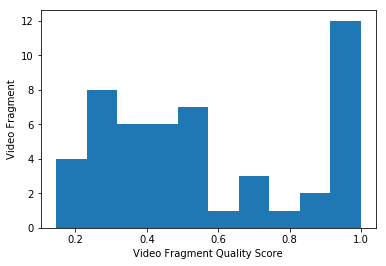

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(results["units"]["uqs"])
plt.xlabel("Video Fragment Quality Score")
plt.ylabel("Video Fragment")

The `unit_annotation_score` column in `results["units"]` contains the **video fragment-annotation scores**, capturing the likelihood that an annotation is expressed in a video fragment. For each video fragment, we store a dictionary mapping each annotation to its video fragment-relation score.

In [8]:
results["units"]["unit_annotation_score"].head()

unit
1856509899    {u'sportsmanager': 0.0, u'archeologist': 0.0, ...
1856509900    {u'sportsmanager': 0.0, u'producer': 0.0031954...
1856509901    {u'sportsmanager': 0.0, u'archeologist': 0.0, ...
1856509902    {u'sportsmanager': 0.0, u'archeologist': 0.0, ...
1856509903    {u'sportsmanager': 0.0, u'archeologist': 0.000...
Name: unit_annotation_score, dtype: object

The **worker metrics** are stored in `results["workers"]`:

In [9]:
results["workers"].head()

,duration,job,judgment,unit,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
3587109,12.840000,1,25,25,0.470469,0.603399,0.779698,0.215188,0.371369,0.579445
4316379,24.040000,1,25,25,0.511478,0.668219,0.765435,0.280311,0.436881,0.641618
6330997,38.714286,1,7,7,0.468025,0.615484,0.760417,0.320348,0.457103,0.700822
6339764,80.500000,1,10,10,0.019778,0.122949,0.160866,0.028307,0.122603,0.230880
6367365,29.280000,1,25,25,0.172523,0.385336,0.447722,0.122195,0.275177,0.444062


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

Text(0,0.5,u'Workers')

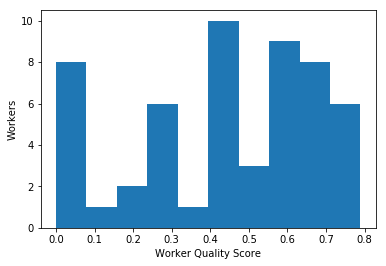

In [10]:
plt.hist(results["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

The **annotation metrics** are stored in `results["annotations"]`. The `aqs` column contains the **annotation quality scores**, capturing the overall worker agreement over one relation.

In [11]:
results["annotations"]

,output.selected_answer,aqs,aqs_initial
archeologist,1000,1.000000e-08,1.000000e-08
architect,1000,1.000000e-08,1.000000e-08
artist,1000,2.512851e-01,2.520942e-01
astronaut,1000,9.999680e-01,9.523810e-01
athlete,1000,2.801650e-01,2.788104e-01
businessperson,1000,6.188727e-02,9.618163e-02
celebrity,1000,7.459197e-01,6.066316e-01
chef,1000,1.000000e-08,1.000000e-08
criminal,1000,1.272384e-01,1.530612e-01
engineer,1000,3.608684e-02,2.991453e-02
